In [1]:
# imports and setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from collections import Counter

# sklearn imports
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score, accuracy_score

In [2]:
data = pd.read_csv('./data/clean_cars1605.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 1 to 3388
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ad_num         2933 non-null   float64
 1   company        2933 non-null   object 
 2   model          2933 non-null   object 
 3   price          2933 non-null   float64
 4   engine         2933 non-null   float64
 5   year           2933 non-null   int64  
 6   hand           2933 non-null   int64  
 7   km             2933 non-null   int64  
 8   eng_kind       2933 non-null   int64  
 9   test           2933 non-null   object 
 10  current_owner  2933 non-null   float64
 11  prev_owner     2933 non-null   float64
 12  color          2933 non-null   int64  
 13  gearbox        2933 non-null   float64
 14  trader         2933 non-null   int64  
 15  area           2933 non-null   int64  
 16  sub_area       2933 non-null   object 
 17  price_list     2933 non-null   float64
 18  price070

# KM handle

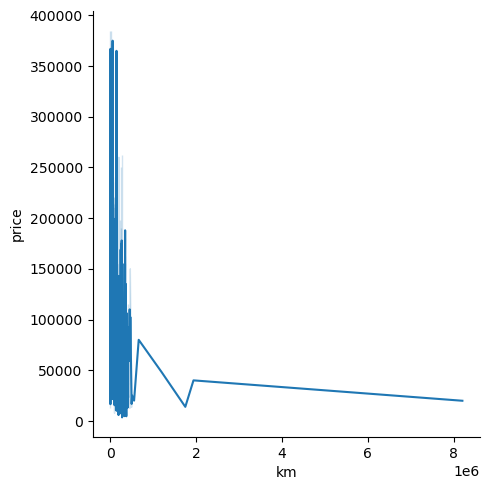

In [3]:
sns.relplot(data=data,x='km',y='price',kind='line')

In [4]:
pd.options.display.max_rows = 999

data.sort_values('km')

,ad_num,company,model,price,engine,year,hand,km,eng_kind,test,...,trader,area,sub_area,price_list,price0705,enc_company,enc_model,price1605,sold,car_kind
2284,82720236.0,מיצובישי,אאוטלנדר,128000.0,1998.0,2019,1,1,7,04/2024,...,0,41,שפיר,128400.0,62000.0,4,0,120000.0,0,ג'יפים
2879,97190849.0,קיה,נירו הייבריד,115000.0,1580.0,2019,2,65,7,10/2024,...,0,75,גבעת זאב,107500.0,-1.0,2,25,-1.0,1,משפחתיים
1937,84200223.0,טסלה,מודל Y,99999.0,0.0,2022,1,76,2,05/2024,...,0,100,ירושלים,360100.0,-1.0,21,287,-1.0,1,משפחתיים
2586,79078719.0,סקודה,ראפיד,67000.0,999.0,2019,2,102,7,01/2024,...,0,41,אשקלון,65600.0,56900.0,3,101,54000.0,0,משפחתיים
2576,94461220.0,פיג'ו,301,22900.0,1199.0,2015,3,108,7,12/2023,...,0,41,רחובות,16500.0,11000.0,14,288,14999.0,0,משפחתיים
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62752184.0,טויוטה,לנד קרוזר ארוך,80000.0,2982.0,2006,1,665000,6,09/2023,...,0,19,משמרת,92400.0,80000.0,0,12,80000.0,0,ג'יפים
1103,81923169.0,סיטרואן,ברלינגו דור 2 (2008-2019),48000.0,1560.0,2016,3,1200989,6,08/2023,...,0,19,נתניה,41900.0,-1.0,20,59,-1.0,1,מסחריים
1684,94248047.0,סובארו,אימפרזה ניו אייג',13900.0,1498.0,2007,4,1750000,7,02/2024,...,0,101,עפולה,8000.0,-1.0,18,199,-1.0,1,משפחתיים
1606,41860338.0,ביואיק,לה קרוס,40000.0,3564.0,2011,3,1940000,7,07/2023,...,0,101,עפולה,36100.0,27000.0,39,214,26000.0,0,מנהלים


In [5]:
# all km's wiith 2 or 3 digs multiply by 1000
# reverted data in logical way.
for index, row in data.iterrows():
    if 10 <= data.at[index,'km'] <= 500:
        data.at[index,'km'] = row.km * 1000

In [6]:
# made for assessment and detected lots of missed outliers, wich handled above and rerun.
Q1 = np.percentile(data.km, 25)
Q3 = np.percentile(data.km, 75)
IQR = Q3 - Q1
fare_rows = data[(data.km < Q1 - IQR*0.5) | (data.km > Q3 + 2*IQR)].copy()
fare_rows
# after re run decided to delete all data above 1M km.

,ad_num,company,model,price,engine,year,hand,km,eng_kind,test,...,trader,area,sub_area,price_list,price0705,enc_company,enc_model,price1605,sold,car_kind
14,97531975.0,פורד,אקספלורר,27500.0,4601.0,2006,5,420000,7,01/2024,...,0,2,רמת גן,25900.0,80000.0,11,28,23000.0,0,ג'יפים
134,72797898.0,טויוטה,לנד קרוזר ארוך,92000.0,2982.0,2005,2,435000,6,05/2023,...,0,2,בן שמן,90700.0,84000.0,0,12,83500.0,0,ג'יפים
153,42862808.0,מיצובישי,ASX,142000.0,1998.0,2022,1,1450,7,11/2024,...,0,2,רמת גן,146400.0,-1.0,4,77,-1.0,1,משפחתיים
365,63142453.0,מקסוס,אי-דליבר 9,250000.0,0.0,2022,1,1000,2,09/2024,...,0,2,רמת גן,-1.0,-1.0,54,334,-1.0,0,מסחריים
463,43442171.0,וולוו,XC40,299000.0,0.0,2022,1,1000,2,10/2024,...,0,25,קרית מוצקין,223700.0,189000.0,22,161,-1.0,1,ג'יפים
582,84885412.0,טויוטה,לנד קרוזר פרדו קצר,38000.0,2982.0,2000,7,400000,6,05/2023,...,0,25,מג'דל שמס,55600.0,38000.0,0,318,38000.0,0,ג'יפים
682,96166476.0,מיצובישי,L200 האנטר 4X4,37000.0,2477.0,2008,2,415000,6,10/2023,...,0,25,מגדל העמק,36300.0,-1.0,4,182,-1.0,1,טנדרים
689,47060253.0,טויוטה,היילקס ויגו 4X4,74999.0,2494.0,2008,2,400000,6,11/2023,...,0,25,טמרה,68500.0,-1.0,0,231,-1.0,1,טנדרים
1080,62752184.0,טויוטה,לנד קרוזר ארוך,80000.0,2982.0,2006,1,665000,6,09/2023,...,0,19,משמרת,92400.0,80000.0,0,12,80000.0,0,ג'יפים
1103,81923169.0,סיטרואן,ברלינגו דור 2 (2008-2019),48000.0,1560.0,2016,3,1200989,6,08/2023,...,0,19,נתניה,41900.0,-1.0,20,59,-1.0,1,מסחריים


In [7]:
data_to_del = data[data.km > 1000000].copy()
data_to_del

,ad_num,company,model,price,engine,year,hand,km,eng_kind,test,...,trader,area,sub_area,price_list,price0705,enc_company,enc_model,price1605,sold,car_kind
1103,81923169.0,סיטרואן,ברלינגו דור 2 (2008-2019),48000.0,1560.0,2016,3,1200989,6,08/2023,...,0,19,נתניה,41900.0,-1.0,20,59,-1.0,1,מסחריים
1606,41860338.0,ביואיק,לה קרוס,40000.0,3564.0,2011,3,1940000,7,07/2023,...,0,101,עפולה,36100.0,27000.0,39,214,26000.0,0,מנהלים
1684,94248047.0,סובארו,אימפרזה ניו אייג',13900.0,1498.0,2007,4,1750000,7,02/2024,...,0,101,עפולה,8000.0,-1.0,18,199,-1.0,1,משפחתיים
2244,52209701.0,פורד,אקונוליין ארוך,19900.0,7269.0,2003,10,8200000,6,06/2023,...,0,100,ירושלים,-1.0,-1.0,11,346,-1.0,0,מסחריים


In [8]:
data = data[data.km < 1000000].copy()

# Object data handle

In [9]:
for y,x in zip(data.columns,data.dtypes):
    if x == 'object':
        data[y]=pd.factorize(data[y])[0]

In [10]:
# pd.options.display.max_rows = 999

data

,ad_num,company,model,price,engine,year,hand,km,eng_kind,test,...,trader,area,sub_area,price_list,price0705,enc_company,enc_model,price1605,sold,car_kind
1,65146899.0,0,0,140000.0,3604.0,2017,2,95000,7,0,...,0,2,0,159500.0,140000.0,16,9,195000.0,0,0
2,73811682.0,0,1,268000.0,1995.0,2021,2,29000,7,1,...,0,2,1,278100.0,-1.0,16,45,-1.0,1,0
3,77276021.0,1,2,149000.0,2360.0,2020,2,74000,3,2,...,0,2,2,155500.0,-1.0,4,67,-1.0,1,0
4,55670284.0,2,3,145000.0,1341.0,2022,1,17000,7,3,...,0,2,3,152100.0,126000.0,8,189,118000.0,0,0
5,93516523.0,3,4,250000.0,1969.0,2022,2,30000,7,3,...,0,2,2,274700.0,250000.0,22,32,235500.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61230592.0,20,105,15000.0,1598.0,2009,3,300000,7,12,...,0,43,419,12700.0,17000.0,6,11,13000.0,0,1
3385,96450445.0,18,258,62000.0,1798.0,2014,3,147000,7,11,...,0,43,396,54900.0,60000.0,0,58,59000.0,0,1
3386,87660871.0,32,84,58000.0,1598.0,2017,1,53500,6,10,...,0,43,394,-1.0,29000.0,23,138,32000.0,0,5
3387,69065361.0,0,217,230000.0,1332.0,2022,1,7000,3,11,...,0,43,394,223900.0,220000.0,16,142,184000.0,0,0


# Logistic Regration try

# sale within one week prediction:

In [11]:
# try to predict the total sales until 7/05
X = data.drop(['ad_num','sold', 'price1605', 'price0705','trader','model','company','enc_model','color'], axis=1).copy()
# the explained col parameter, need to fit it to the sold0705 (the sold col includes the sold1605 sold col)
y = (data.price0705 == -1).astype(int)
print(y.sum())
# divide the data to train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# training the classifier
clf_0705 = LogisticRegression().fit(X_train_scaled, y_train)

# predict the results by the X_test
pred_y = clf_0705.predict(X_test_scaled)

# print crucial params report
print(f1_score(y_true=y_test, y_pred=pred_y))
print(metrics.classification_report(y_test, pred_y))

750
0.0
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       762
           1       0.00      0.00      0.00       205

    accuracy                           0.79       967
   macro avg       0.39      0.50      0.44       967
weighted avg       0.62      0.79      0.69       967



In [12]:
y_pred1 = (pred_y == 1).sum()
y_pred0 = (pred_y == 0).sum()
print('y_pred1 is ', y_pred1)
print('y_pred0 is ', y_pred0)
metrics.confusion_matrix(y_true=y_test,y_pred=pred_y)

y_pred1 is  1
y_pred0 is  966


array([[761,   1],
       [205,   0]], dtype=int64)

we can see that there is not enouth data for the sold cars, so it is not effective to run the loggistic regration after only one week of data collection.

# try to to predict the results of car sold from may 1 to 16

In [13]:
def scale_data(X):
    # scale the data
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [14]:
# try to predict the total sales until 16/05
X = data.drop(['ad_num','sold', 'trader','model','company', 'price1605', 'price0705'], axis=1).copy()
# the explained col parameter
y = data.sold.copy()
# divide the data to train (67%) and test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# training the classifier
clf_1605 = LogisticRegression().fit(X_train_scaled, y_train)

# predict the results by the X_test
pred_y = clf_1605.predict(X_test_scaled)

# print crucial params report
print(f'f1_score is: {f1_score(y_true=y_test, y_pred=pred_y)}')
print(f'accuracy is: {accuracy_score(y_true=y_test, y_pred=pred_y)}')
metrics.confusion_matrix(y_true=y_test,y_pred=pred_y)

f1_score is: 0.2197309417040359
accuracy is: 0.640124095139607


array([[570,  54],
       [294,  49]], dtype=int64)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.utils.class_weight import compute_class_weight


list_of_cols_to_drop = ['ad_num','sold', 'trader','model','company', 'price1605', 'price0705']

# treat the test X and y
X = data.drop(list_of_cols_to_drop, axis=1).copy()
y = data.sold

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

print (f'train shapes are: {X_train.shape} , {y_train.shape}')

unique_classes = list(data['sold'].unique())
unique_classes

out_dict = {}
for classes in unique_classes:
    out_dict[classes] = data.shape[0]/((data.loc[data['sold'] == classes].shape[0])
                                     *len(unique_classes))

print(f'out_dict = {out_dict}')

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

weights = np.linspace(0.6,0.4)

# training the classifier
clf_1605 = GridSearchCV(estimator=LogisticRegression(),
                        param_grid={'class_weight':[{0:x,1:1.0-x}for x in weights]}, 
                        scoring='f1',
                        cv=5)

clf_1605.fit(X_train_scaled, y_train)

# predict the results by the X_test
pred_y = clf_1605.predict(X_test_scaled)
pred_train_y = clf_1605.predict(X_train_scaled)
# print crucial params report
print(f'f1_score is: {f1_score(y_true=y_test, y_pred=pred_y)}')
print(f'accuracy for train is: {accuracy_score(y_true=y_train, y_pred=pred_train_y)}')
print(f'accuracy for test is: {accuracy_score(y_true=y_test, y_pred=pred_y)}')
metrics.confusion_matrix(y_true=y_test,y_pred=pred_y)

train shapes are: (1962, 17) , (1962,)
out_dict = {0: 0.8100110619469026, 1: 1.3064228367528992}
f1_score is: 0.47115384615384615
accuracy for train is: 0.5744138634046891
accuracy for test is: 0.5449844881075491


array([[331, 293],
       [147, 196]], dtype=int64)

### The Best accuracy we got is 64%
### while f1_score is 22%

# Synthesize data 

### K_fold try
Try to get a higher f_score using K_fold methode to divide the data in various ways

In [16]:
from sklearn.model_selection import KFold
# try to predict the total sales until 16/05
def k_fold_try(n):
    X = data.drop(['ad_num','sold', 'trader','model','company', 'price1605', 'price0705'], axis=1).copy()
    # the explained col parameter
    y = data.sold.copy()
    kf = KFold(n_splits=n)
    kf.get_n_splits(X)
    X_train=[]
    X_test=[]
    y_train=[]
    y_test =[]

    for i, (train_index, test_index) in enumerate(kf.split(X)):
    #     print(f"Fold {i}:")
    #     print(f"  Train: index={train_index}")
    #     print(f'Train size = {len(train_index)}')
    #     print(f"  Test:  index={test_index}")
    #     print(f'Test size = {len(test_index)}')
        X_train_unscaled = X.iloc[train_index]
        X_test_unscaled = X.iloc[test_index]
        X_train.append(scale_data(X_train_unscaled))
        y_train.append(y.iloc[train_index])
        X_test.append(scale_data(X_test_unscaled))
        y_test.append(y.iloc[test_index])
    clf = []
    f_scores = []
    precisions = []
    for i in range(0,len(X_train)):
        clf.append(LogisticRegression().fit(X_train[i], y_train[i]))
        y_pred = clf[i].predict(X_test[i])
        f_scores.append(f1_score(y_true=y_test[i], y_pred=y_pred))
        precisions.append(precision_score(y_test[i], y_pred))
    print(f'precisions are: {precisions}')
    print(f'f_scores are: {f_scores}')

In [17]:
print('try to divide the data in 3 places:')
k_fold_try(3)

print('try to divide the data in 4 places:')
k_fold_try(4)

print('try to divide the data in 5 places:')
k_fold_try(5)

print('try to divide the data in 6 places:')
k_fold_try(6)

try to divide the data in 3 places:
precisions are: [0.3404255319148936, 0.5454545454545454, 0.5121951219512195]
f_scores are: [0.07565011820330969, 0.17987152034261242, 0.10606060606060605]
try to divide the data in 4 places:
precisions are: [0.46875, 0.4523809523809524, 0.3023255813953488, 0.4444444444444444]
f_scores are: [0.0967741935483871, 0.11275964391691394, 0.07784431137724551, 0.13245033112582785]
try to divide the data in 5 places:
precisions are: [0.5555555555555556, 0.38461538461538464, 0.7142857142857143, 0.4117647058823529, 0.3783783783783784]
f_scores are: [0.08032128514056225, 0.11538461538461539, 0.15151515151515152, 0.1021897810218978, 0.1217391304347826]
try to divide the data in 6 places:
precisions are: [0.4666666666666667, 0.5416666666666666, 0.5675675675675675, 0.358974358974359, 0.47058823529411764, 0.32142857142857145]
f_scores are: [0.06542056074766354, 0.12935323383084577, 0.1794871794871795, 0.12068965517241378, 0.07441860465116279, 0.0972972972972973]


We do not get any benefit when using this devision 

All the f_scores and precision much lower then the original logistic regration scores above.

#### lets try another attitude

### Sintasize the data for train to be even

take even samples of sold and unsold car ads

In [18]:
def even_trained_clf(num_of_train_samples, num_of_tries, list_of_cols_to_drop):
    f_scores = []
    clfs = []
    accuracies = []
    confution_matrixes = []
    for i in range(0, num_of_tries):
        # sintasize new even df to train model
        sold_data = data[data.sold == 1].sample(int(num_of_train_samples))
        unsold_data = data[data.sold == 0].sample(int(num_of_train_samples))
        even_train_data = pd.concat([sold_data, unsold_data], axis=0)
        even_train_data.sort_index(inplace=True)

        # get the other data for test
        test_data = pd.concat([data,even_train_data], axis=0).drop_duplicates(keep=False)
        test_data = test_data.sample(num_of_train_samples).sort_index()

        # print(f'data shape is {data.shape} , test data shape is {test_data.shape}')

        # treat the train X and y
        X_train = even_train_data.drop(list_of_cols_to_drop, axis=1).copy()
        y_train = even_train_data.sold

        # treat the test X and y
        X_test = test_data.drop(list_of_cols_to_drop, axis=1).copy()
        y_test = test_data.sold

        # scale the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.fit_transform(X_test)

        # training the classifier
        clfs.append(LogisticRegression().fit(X_train_scaled, y_train))

        # predict the results by the X_test
        pred_y = clfs[i].predict(X_test_scaled)
        
        f_scores.append(f1_score(y_true=y_test, y_pred=pred_y))
        confution_matrixes.append(metrics.confusion_matrix(y_true=y_test,y_pred=pred_y))
        accuracies.append(accuracy_score(y_true=y_test, y_pred=pred_y))

        
        # print crucial params report
#         print(f1_score(y_true=y_test, y_pred=pred_y))
#         print(metrics.classification_report(y_test, pred_y))
    max_f_score = max(f_scores)
    clf = clfs[f_scores.index(max_f_score)]
    max_matrix = confution_matrixes[f_scores.index(max_f_score)]
    max_accuracy = accuracies[f_scores.index(max_f_score)]
    
    return clf, max_f_score, max_matrix, max_accuracy

In [19]:
# list_of_cols_to_drop = ['ad_num','sold', 'trader','model','company', 'price1605', 'price0705','area', 'color', 'prev_owner']
list_of_cols_to_drop = ['ad_num','sold', 'trader','model','company', 'price1605', 'price0705']

clf, max_f_score, max_matrix, max_accuracy = even_trained_clf(600, 30, list_of_cols_to_drop)

print(f'max f_score is: {max_f_score}, its accuracy is {max_accuracy}.')
print('its confution merix is:')
print(max_matrix)

max f_score is: 0.46605504587155966, its accuracy is 0.515.
its confution merix is:
[[182 225]
 [ 66 127]]


#### We can see higher f score:
### f_score is 49%
### accuracy is 56%

# Desicion Tree try

In [20]:
#convert all strings to numeric data:
for y,x in zip(data.columns,data.dtypes):
    if x == 'object':
        data[y]=pd.factorize(data[y])[0]
# get all numeric cols from data, beside price0705
# try to predict the total sales until 16/05
X = data.drop(['ad_num','sold', 'trader','model','company', 'price1605', 'price0705', 'color', 'sub_area', 'test'], axis=1).copy()
# the explained col parameter
y = data.sold.copy()
# divide the data to train (67%) and test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=142)

dtcs = []
f_scores = []
accuracies = []
conf_mats = []

for i in range(0,30):
    dtcs.append(tree.DecisionTreeClassifier(max_depth=7).fit(X_train, y_train))
    pred_res = dtcs[i].predict(X_test)
    f_scores.append(f1_score(y_test,pred_res))
    accuracies.append(accuracy_score(y_test, pred_res))
    conf_mats.append(metrics.confusion_matrix(y_test,pred_res))

max_f_score = max(f_scores)
accuracy = accuracies[f_scores.index(max_f_score)]
conf_mat = conf_mats[f_scores.index(max_f_score)]

print(f'f_score is {max_f_score}')
print(f'accuracy is: {accuracy}')
print(f'confusion matrix is:')
print(conf_mat)

f_score is 0.2732447817836812
accuracy is: 0.6039296794208894
confusion matrix is:
[[512  74]
 [309  72]]


### 60% accuracy
### f1 score is higher then first logistic regration 27%
### becouse of the low f_score we we can say that the even trained logistic regration is better.

## Sintacized data for even train data

### as we did previously in the even logistic regration

In [21]:
def even_trained_tree_clf(num_of_train_samples, num_of_tries, list_of_cols_to_drop):
    f_scores = []
    clfs = []
    accuracies = []
    confution_matrixes = []
    for i in range(0, num_of_tries):
        # sintasize new even df to train model
        sold_data = data[data.sold == 1].sample(int(num_of_train_samples*0.8))
        unsold_data = data[data.sold == 0].sample(int(num_of_train_samples))
        even_train_data = pd.concat([sold_data, unsold_data], axis=0)
        even_train_data.sort_index(inplace=True)

        # get the other data for test
        n_data = pd.concat([data,even_train_data], axis=0).drop_duplicates(keep=False)
        test_data = n_data.sample(int(num_of_train_samples*0.5)).sort_index()
#         test_data = n_data[n_data.sold == 0]

        # print(f'data shape is {data.shape} , test data shape is {test_data.shape}')

        # treat the train X and y
        X_train = even_train_data.drop(list_of_cols_to_drop, axis=1).copy()
        y_train = even_train_data.sold

        # treat the test X and y
        X_test = test_data.drop(list_of_cols_to_drop, axis=1).copy()
        y_test = test_data.sold

        # divide the data to train (67%) and test (33%)
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        
        # scale the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.fit_transform(X_test)
        
        parameters = {'max_depth':[2,3,4,5,6],"min_samples_split":[5,8,10,15,20] }
        dt = tree.DecisionTreeClassifier()
        
        # training the classifier
        clfs.append(GridSearchCV(dt, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True), n_jobs=-1).fit(X_train, y_train))

        # predict the results by the X_test
        pred_y = clfs[i].predict(X_test)
        
        f_scores.append(f1_score(y_true=y_test, y_pred=pred_y))
        confution_matrixes.append(metrics.confusion_matrix(y_true=y_test,y_pred=pred_y))
        accuracies.append(accuracy_score(y_true=y_test, y_pred=pred_y))

        
        # print crucial params report
#         print(f1_score(y_true=y_test, y_pred=pred_y))
#         print(metrics.classification_report(y_test, pred_y))
    max_f_score = max(f_scores)
    clf = clfs[f_scores.index(max_f_score)]
    max_matrix = confution_matrixes[f_scores.index(max_f_score)]
    max_accuracy = accuracies[f_scores.index(max_f_score)]
    
    return clf, max_f_score, max_matrix, max_accuracy

In [22]:
print(f'num of sold data is : {(data.sold == 1).sum()}')
num_of_samples = 800

list_of_cols_to_drop = ['ad_num','sold', 'trader','model','company', 'price1605', 'price0705','area', 'color', 'prev_owner']
# list_of_cols_to_drop = ['ad_num','sold', 'trader','model','company', 'price1605', 'price0705']

clf, max_f_score, max_matrix, max_accuracy = even_trained_tree_clf(num_of_samples, 30, list_of_cols_to_drop)

print('test results:')
print(f'max f_score is: {max_f_score}, its accuracy is {max_accuracy}.')
print('its confution merix is:')
print(max_matrix)

num of sold data is : 1121
test results:
max f_score is: 0.485, its accuracy is 0.485.
its confution merix is:
[[ 97 160]
 [ 46  97]]


we can see that when trainning the model with even data set we get much better results.

and when we remove color, area we get better results.

# Random forest

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'n_estimators':range(50,301,50),
              'max_depth':[3,4],
              'min_samples_split':[2,3,4]}
rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True),cv=3, verbose=2, n_jobs=-1)

num_of_samples = 800

sold_data = data[data.sold == 1].sample(int(num_of_samples*0.8))
unsold_data = data[data.sold == 0].sample(int(num_of_samples))
even_train_data = pd.concat([sold_data, unsold_data], axis=0)
even_train_data.sort_index(inplace=True)

# get the other data for test
n_data = pd.concat([data,even_train_data], axis=0).drop_duplicates(keep=False)
test_data = n_data.sample(int(num_of_samples*0.5))

# treat the train X and y
X_train = even_train_data.drop(list_of_cols_to_drop, axis=1).copy()
y_train = even_train_data.sold

# treat the test X and y
X_test = test_data.drop(list_of_cols_to_drop, axis=1).copy()
y_test = test_data.sold

clf.fit(X_train, y_train)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
best parameter set is: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}  and its score was 0.2920175404555862


In [24]:

pred_res = clf.predict(X_test)
train_res = clf.predict(X_train)

print('train states:')
print(f'f_score is: {f1_score(y_true=y_train,y_pred=train_res)}')
print(f'train accuracy is: {accuracy_score(y_true=y_train, y_pred=train_res)}')
print(metrics.confusion_matrix(y_true=y_train,y_pred=train_res))

print('test states:')
print(f'f_score is: {f1_score(y_true=y_test,y_pred=pred_res)}')
print(f'test accuracy is: {accuracy_score(y_true=y_test, y_pred=pred_res)}')
print(metrics.confusion_matrix(y_true=y_test,y_pred=pred_res))


train states:
f_score is: 0.38434982738780205
train accuracy is: 0.6284722222222222
[[738  62]
 [473 167]]
test states:
f_score is: 0.2093023255813954
test accuracy is: 0.66
[[246  30]
 [106  18]]


### f1_score is better then logistic regration and worse then decission tree.

# Balancing the data using imblearn library


In [25]:
from sklearn.model_selection import cross_validate

X = data.drop(['ad_num','sold', 'trader','model','company', 'price1605', 'price0705'], axis=1).copy()
# the explained col parameter
y = data.sold.copy()

counter = Counter(y)
for k, v in counter.items():
    dist = v/len(y) *100
    print(f'class = {k}, n= {v}, ({dist}%)')

model = tree.DecisionTreeClassifier()
scores = cross_validate(model, X, y, cv=6, n_jobs=-1, scoring=make_scorer(f1_score , average='macro'))

print(scores)

class = 0, n= 1808, (61.727552065551386%)
class = 1, n= 1121, (38.272447934448614%)
{'fit_time': array([0.0210917 , 0.02009392, 0.01909328, 0.02108288, 0.02200437,
       0.02299857]), 'score_time': array([0.00200534, 0.00200534, 0.00200534, 0.00200295, 0.00200009,
       0.00201058]), 'test_score': array([0.46706628, 0.50799366, 0.39186783, 0.54130325, 0.50377308,
       0.45274993])}


In [26]:
!pip3 install imblearn

### try to oversample:

In [27]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

In [28]:
unique_classes = list(y.unique())
unique_classes

[0, 1]

In [29]:
counter = Counter(y)
for k, v in counter.items():
    dist = v/len(y) *100
    print(f'class = {k}, n= {v}, ({dist}%)')

class = 0, n= 1808, (50.0%)
class = 1, n= 1808, (50.0%)


In [30]:
model = tree.DecisionTreeClassifier()
scores = cross_validate(model, X, y, cv=6, n_jobs=-1, scoring=make_scorer(f1_score , average='macro'))


In [31]:
scores

{'fit_time': array([0.02747369, 0.02647209, 0.02447295, 0.02547622, 0.02606344,
        0.02359724]),
 'score_time': array([0.00200295, 0.00200367, 0.00200367, 0.00258255, 0.00199938,
        0.00200033]),
 'test_score': array([0.41338336, 0.30943047, 0.1290083 , 0.18395522, 0.50509491,
        0.50081674])}

### we can see that the score not very good.
### try diferent way with under sample:

In [32]:
from imblearn.under_sampling import RandomUnderSampler

X = data.drop(['ad_num','sold', 'trader','model','company', 'price1605', 'price0705'], axis=1).copy()
# the explained col parameter
y = data.sold.copy()

undersumple = RandomUnderSampler()

X, y = undersumple.fit_resample(X, y)

In [33]:
from collections import Counter

counter = Counter(y)
for k, v in counter.items():
    dist = v/len(y) *100
    print(f'class = {k}, n= {v}, ({dist}%)')

class = 0, n= 1121, (50.0%)
class = 1, n= 1121, (50.0%)


In [34]:
parameters = {'n_estimators':range(50,301,50),
              'max_depth':[3,4],
              'min_samples_split':[2,3,4]}
rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True),cv=3, verbose=2, n_jobs=-1)

# divide the data to train (67%) and test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=142)

clf.fit(X_train, y_train)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
best parameter set is: {'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 250}  and its score was 0.6354034544848218


In [35]:

pred_res = clf.predict(X_test)
train_res = clf.predict(X_train)

print('train states:')
print(f'f_score is: {f1_score(y_true=y_train,y_pred=train_res)}')
print(f'train accuracy is: {accuracy_score(y_true=y_train, y_pred=train_res)}')
print(metrics.confusion_matrix(y_true=y_train,y_pred=train_res))

print('test states:')
print(f'f_score is: {f1_score(y_true=y_test,y_pred=pred_res)}')
print(f'test accuracy is: {accuracy_score(y_true=y_test, y_pred=pred_res)}')
print(metrics.confusion_matrix(y_true=y_test,y_pred=pred_res))


train states:
f_score is: 0.685968819599109
train accuracy is: 0.6245006657789614
[[322 413]
 [151 616]]
test states:
f_score is: 0.5795053003533569
test accuracy is: 0.5175675675675676
[[137 249]
 [108 246]]


### we can see that the scores are better, and that the classifier is able to prodict more then 50% of the cars correctly.